__Интернет магазин стримчик__

__Цель выполнения проекта :__выявить определяющие успешность игры закономерности, отработать принцип работы с данными, составить кампанию на следующий год.

__Составим план выполнения проекта:__
Шаг 1. Откроем файл с данными и изучим общую информацию

Шаг 2. Предобработаем данные. 
Заменим названия столбцов (приведём к нижнему регистру);
Преобразуем данные в нужные типы. Опишем, в каких столбцах заменим тип данных и почему;
Обработаем пропуски при необходимости:
Объясним, почему заполнили пропуски определённым образом или почему не станем это делать;
Опишем причины, которые могли привести к пропускам;
Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберём это значение и опишем, как его обработать;
Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

Шаг 3. Проведём исследовательский анализ данных
Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
Возьмём данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитываем в работе данные за предыдущие годы.
Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.
Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.
Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы
Соотнесём выводы с продажами игр на других платформах.
Посмотрим наобщее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Шаг 4. Составим портрет пользователя каждого региона
Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.
Самые популярные жанры (топ-5). Поясним разницу.
Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Шаг 5. Проверим гипотезы
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Зададим самостоятельно пороговое значение alpha.
Поясним:
Как мы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применим для проверки гипотез и почему.

Шаг 6. Напишем общий вывод

Для удобства добавим описание данных
Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [1]:
import pandas as pd #ипортируем библиотеку пандас
import scipy.stats as st #Ипортируем библиотеку для проверки гипотез.
import matplotlib.pyplot as plt #ипортируем библиотеку Matplotlib для построения графиков
import numpy as np #Импортируем библиотеку Numpy
import seaborn as sns

__Шаг 1.__ Откроем файл с данными и изучим общую информацию

In [2]:
data = pd.read_csv('/datasets/games.csv')

Выведем первые и последние строки таблицы

In [3]:
data.head() 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
data.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


Обратим внимание на большое количество пропусков и большое количество 0 в конце, можем предположить что данные структурированны по убыванию)

In [5]:
data.info() # Выведем info по таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Обратим внимание на количество строк и столбцов и на dtype присутствующие в таблице.

In [6]:
data.describe() #Выведем describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Для представления общей информации по таблице.

__Вывод__ На данном этапе мы познакомились с общими данными по таблице.
Определили количество строк и столбцов (16715, 11)
Обратили внимание на количество пропусков
Обратили внимание на dtype таблицы (float64(6), object(5))

__Шаг 2.__ Предобработка данных.

Для удобства переведём название столбцов к нижнему регистру ( a,b,c ) с помощью метода lower()

In [7]:
data.columns = data.columns.str.lower()

In [8]:
#Проверяем
data.head() 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Пометка для себя : Последовательность обработки именно такая:

Обработка дубликатов

Обработка пропусков 

Обработка dtype
так как работать с типом данных невозможно при наличии пропусков.

Проверим датасет на наличие дубликатов:

In [9]:
data.duplicated().sum()

0

Проверим датасет на неявные дубликаты по столбцам : Имя, платформа, год релиза.

In [10]:
duplicates = data.duplicated(subset=['name', 'platform', 'year_of_release'], keep=False)
duplicated_rows = data[duplicates]
duplicated_rows

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E


Неявные дубликаты также удаляем.

In [11]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

Оценим количество пропусков к датасете:

In [12]:
data.isna().sum()

name                  1
platform              0
year_of_release     269
genre                 1
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8577
user_score         6700
rating             6765
dtype: int64

Столбец name имеет 2 пропуска :
Во первых это небольшое количество, можно принебречь этими данными, во вторых незная имени, мы не знаем что мы будем оценивать при расчётах, удаляем.

In [13]:
data = data.dropna(subset=['name'])
# Проверяем
data['name'].isna().sum()

0

Столбец year_of_release 269 пропусков , количество небольшое, удаляем.

In [14]:
data = data.dropna(subset=['year_of_release'])
#Проверяем
data['year_of_release'].isna().sum()

0

Столбец genre = 2 пропуска, дропаем.


In [15]:
data=data.dropna(subset=['genre'])
#Проверяем
data['genre'].isna().sum()

0

Теперь столбцы rating, critic_score,user_score.
Удалить эти пропуска мы не можем , т.к они занимают большую часть данных ( явно больше 10 % )
Заменить на среднее значение или медианну не правильно, т.к это показатели рэйтинга,оценка критиков, оценка пользователей.
После бурного обсуждения в нашей команде (читай когорте), по совету "бывалых" принято решение заменить пропущенные значение на "минусовые" , возьмём -1 , эти значения будут выделяться , поэтому мы сможем определить какие значения поставили МЫ.

In [16]:
data['rating'] = data['rating'].fillna('-1')
#Проверяем
data['rating'].isna().sum()

0

In [17]:
data['critic_score'] = data['critic_score'].fillna('-1')
#Проверяем
data['critic_score'].isna().sum()

0

In [18]:
data['user_score'] = data['user_score'].fillna('-1')
#Проверяем
data['user_score'].isna().sum()

0

In [19]:
#Проверим,наличие пропусков ещё раз:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

Пропуски обработаны, теперь работаем с типом  данных


In [20]:
#Выведем ещё раз info по таблице
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  object 
 9   user_score       16443 non-null  object 
 10  rating           16443 non-null  object 
dtypes: float64(5), object(6)
memory usage: 1.5+ MB


Столбец year_of_release переведём в тип int , т.к это год выпуска , это целое число, а дальше приведём к к типу времени пандас

upd. оставляем год релиза как тип int , т.к когда приводим к типу времени пандас и убираем месяц и день , оставляя год , команда .info определяет как int этот столб

In [21]:
data['year_of_release'] = data['year_of_release'].astype('int')
#Проверяем
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  object 
 9   user_score       16443 non-null  object 
 10  rating           16443 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 1.5+ MB


critic_score        
user_score         
rating           

Данные столбцы приводим к типу данных float т.к это числа с плавающей точкой

In [22]:
data['critic_score']=data['critic_score'].astype('float')
#Проверяем
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  object 
 10  rating           16443 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


data['user_score'] = data['user_score'].astype('float')
Появляется ошибка ! could not convert string to float: 'tbd'

Окей,гугл,тьфу, Яндекс конечно: говорят, что столб содержит какие-то знаки, который может не давать изменить тип, но выход есть, команда replace)))

Cтавим "заглушку" -1 на отзывы пользователей.

In [23]:
data['user_score'] = data['user_score'].fillna('-1')
data.loc[data['user_score'] == 'tbd', 'user_score'] = '-1' #значения тбд также меняем на "заглушку -1"
data['user_score'] = data['user_score'].astype('float')
#Проверяем:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


data['user_score'] = data['user_score'].replace('tbd', np.nan, regex=True)
data['user_score'] = data['user_score'].astype('float64')
#Проверяем:
data.info()

На сколько я понял, мы изменили значение на которое "ругался" юпитер , после этого тип поменялся.

data['rating'] = data['rating'].astype('float') 
#Ошибка !could not convert string to float: 'E'
по аналогии выполняем хитрую манипуляцию с replace
Ошибка ! For argument "inplace" expected type bool, received type float.
Как я не пытался, не получилось у меня изменить этот столбец на float.
Принято решение оставить object.

Значение TBD подразумевает собой To Be Determined (будет определено)

Используется, если какая-то информация еще не определена или решение по вопросу не принято.

Можем предположить что данный столбец так и должен иметь тип object 
Можем предположить что данное значение это пропуск и изменить его на -1 , как мы раньше сделали с пропусками в этом столбце.
Можем предположить что изменим тип "игнорируя" с помощью команды replace, на этом  и остановимся

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец total_sales:сложим столбцы eu,jp,na,other sales:

In [24]:
data['total_sales'] = data['na_sales'] + data['eu_sales']+data['jp_sales']+data['other_sales']
#Проверяем
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,-1,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,-1,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,-1,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,-1,28.31


__Вывод__ 

Мы перевели название столбцов к нижнему регистру.
Проверили датасет на дубликаты, дубликаты отсутствуют

Обработали пропуски, там где их было не большое кол-во удалили т.к их объём меньше 10% и они не повлияют на итоги исследований. 

Там где их было много заменили на отрицательное число (-1) эти значения будут выделяться , поэтому мы сможем определить какие значения поставили МЫ.

Преобразовали тип данных интересующих нас столбцов.(почти везде где хотели)

Описали значение TBD: Значение TBD подразумевает собой To Be Determined (будет определено)
Используется, если какая-то информация еще не определена или решение по вопросу не принято.

Можем предположить что данный столбец так и должен иметь тип object 

Можем предположить что данное значение это пропуск и изменить его на -1 , как мы раньше сделали с пропусками в этом столбце.

Можем предположить что изменим тип "игнорируя" с помощью команды replace, на этом  и остановимся

Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец : total_sales

Причиной пропусков может являться ещё "не выход" игр в свет , тоесть в скором времени может ожидаться премьера)

Большое количество пропусков может быть связано с многими факторами, в нашем датасете мы можем предположить что большинство проусков связано с годом выхода игры, если игра выходит в свет в 2016 , то для неё может быть ещё не сформирован какой-то столбец , т.к на дворе сейчас 2016 год... Также причиной пропусков могут быть общие причины: Потеря данных,ошибка ввода,нехватка ресурсов для нахождения информации или простая случайность, этого мы исключать не можем.




__Шаг 3__ Исследовательский анализ данных.

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Представим столбец year of release в форме таблицы 


In [25]:
data['year_of_release'].value_counts().head(10)



2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
Name: year_of_release, dtype: int64

 Рассмотрим гистограмму:

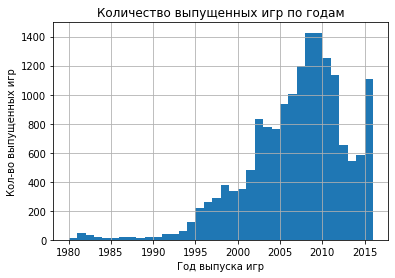

In [26]:
data['year_of_release'].hist(bins=36)
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска игр')
plt.ylabel('Кол-во выпущенных игр')
plt.show()

data['year_of_release'].plt.hist (label='Год релиза')

По гистограмме можно сказать, что пик выпуска игр приходтся на ~2007-2009 годы.

После 2010 мы видим снижение выпускаемых игры, а примерно с 2012 год произошёл "провал" примерно в два раза по числу выпускаемых игр.

Такой провал можно объяснить развитием игр, бесконечные миры, проработка мелких и деталей и т.п.

Для исследования возьмём последние 3 года : 2014,2015,2016 т.к. они наиболее актуально отражают картину на рынке игровой индустрии в данный момент.

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 

Выведем таблицей, на какие платформы выпускаются игры:


In [27]:
data['platform'].value_counts()

PS2     2127
DS      2121
PS3     1305
Wii     1286
X360    1232
PSP     1193
PS      1190
PC       957
GBA      811
XB       803
GC       542
3DS      512
PSV      429
PS4      392
N64      316
XOne     247
SNES     239
SAT      173
WiiU     147
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

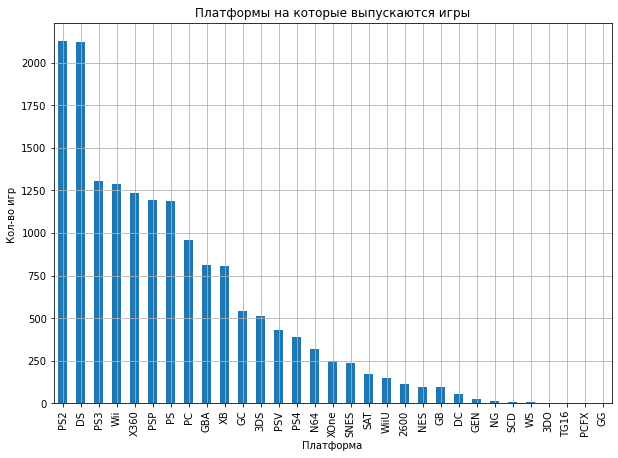

In [28]:
 data['platform'].value_counts().plot(kind='bar',figsize=(10,7),title='Платформы на которые выпускаются игры',xlabel='Платформа',ylabel='Кол-во игр ',grid=True)
plt.show()

Явными лидерами по выпуску игр являются платформы :

PS2,DS,PS3,Wii,X360

Причём стоит отметить что большинство игр выпускается на платформы PS2,DS тоесть они безспорные лидеры)

Теперь рассмотрим платформы с наибольшими суммами продаж, с помощью метода pivot_table сгруппируем platform с total_sales,переменную назовём platform_sales


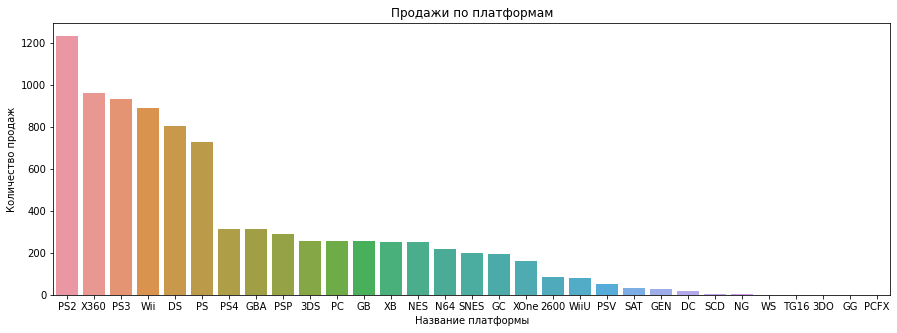

In [29]:
platform_sales = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=platform_sales.index,y=platform_sales['total_sales'])
plt.title("Продажи по платформам")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.show()

PS2,X360,PS3,Wii,DS,PS(Выделим 6)т.к по графику видно что между ds и ps небольшая разница , а вот между ps и ps разница почти в два раза)
Платформы имеющие наибольшую сумму продаж
шесть платформ те же что и в таблице по выпуску, тоесть чем больше выпуск игр, тем больше выручка по ним, что вполне логично(с небольшими особенностями)

In [30]:
platform_sales.sort_values(by='total_sales',ascending=False) #Те же данные в виде таблицы

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Рассмотрим на графиках распределение по годам для топ платформ по обороту с помощью функции.

PS2


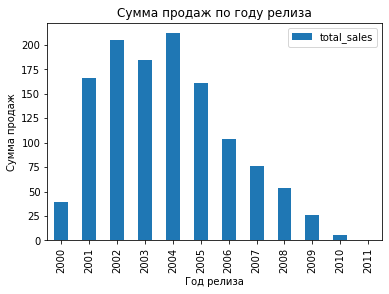

X360


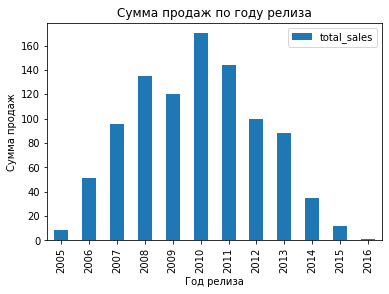

PS3


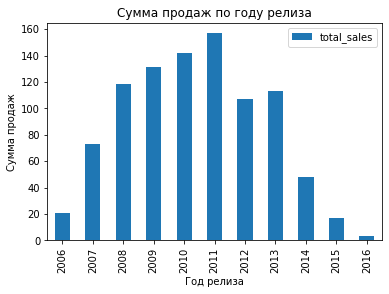

Wii


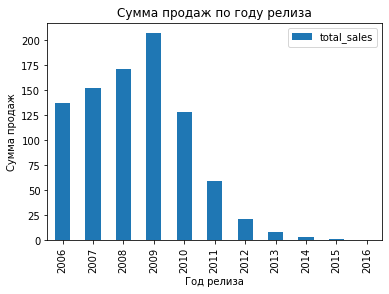

DS


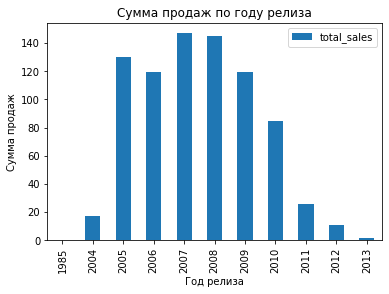

PS


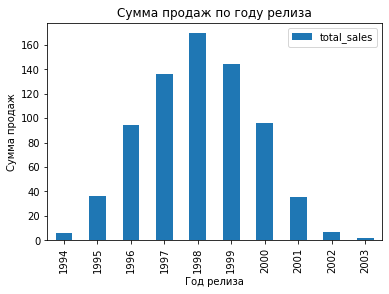

In [31]:
for platform in platform_sales.index[:6]: #Топ 6 платформ из таблицы platform_sales
    print(platform)
    data.query('platform==@platform').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar') 
    plt.title('Сумма продаж по году релиза')
    plt.xlabel('Год релиза')
    plt.ylabel('Сумма продаж')
    plt.show()

Выделив 6 платформ по сумме продаж за все годы, мы видим что платформы на были на пике продаж в годы намного раньше и к нынешнему (2016 год) уже не выпускаются, либо имеют мизерную выручку по сравнению с предыдущим успехом, следовательно необходимо брать данные за последние 3 года, чтобы найти актуальные платформы.
Отвечая на вопрос задания : 
Данные за все периоды - не важны.

Посмотрим как менялись продажи по платформам.

Выбраны платформы с наибольшими суммарными продажами и построены распределения по годам.


Характерный срок существования платформы - __7__ лет


При этом первые пару лет они набирают оборот, 3-5 лет находятся на пике , и дальше их популярность падает , а вместе с популярностью и продажи.

Возьмём данные за соответствующий актуальный период. Актуальный период определим 2014,2015,2016,т.к основной фактор - эти данные помогут построить прогноз на 2017 год.

In [32]:
actual_data = data.query('year_of_release >= 2014')
#проверяем
actual_data.sample(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
11168,Terraria,3DS,2016,Action,0.00,0.04,0.05,0.00,71.0,7.1,T,0.09
13928,Don Bradman Cricket 14,XOne,2015,Sports,0.00,0.04,0.00,0.00,-1.0,-1.0,-1,0.04
261,Minecraft,PS4,2014,Misc,1.48,2.02,0.14,0.68,-1.0,-1.0,-1,4.32
2782,FIFA 17,PS3,2016,Sports,0.05,0.55,0.03,0.10,-1.0,3.3,E,0.73
9367,Pro Baseball Spirits 2015,PSV,2015,Action,0.00,0.00,0.13,0.00,-1.0,-1.0,-1,0.13
14842,The Peanuts Movie: Snoopy's Grand Adventure,3DS,2015,Action,0.00,0.03,0.00,0.00,-1.0,8.8,E,0.03
1012,The Elder Scrolls Online,PS4,2015,Role-Playing,0.67,0.79,0.00,0.29,-1.0,-1.0,-1,1.75
3365,WWE 2K17,PS4,2016,Sports,0.17,0.34,0.00,0.09,69.0,6.9,T,0.60
11609,Song of the Deep,PS4,2016,Action,0.06,0.00,0.00,0.01,69.0,7.3,E,0.07
16052,Girl Friend Beta: Kimi to Sugosu Natsuyasumi,PSV,2015,Action,0.00,0.00,0.02,0.00,-1.0,-1.0,-1,0.02


Рассмотрим платформы с наибольшими суммами продаж за 2014-2016 года из датасета actual_data

Text(0, 0.5, 'Количество продаж')

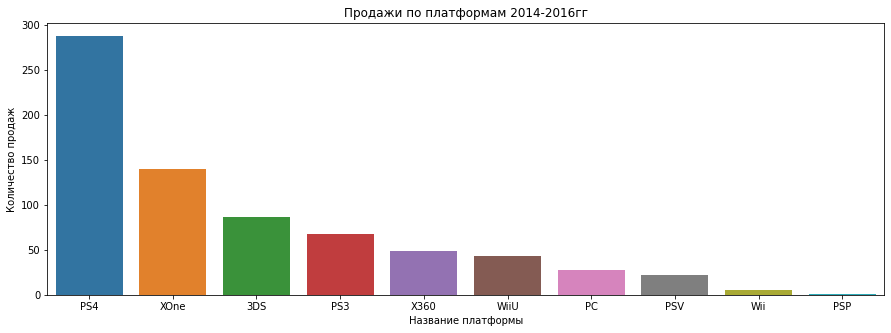

In [33]:
actual_platform_sales = actual_data.pivot_table( index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(15,5))
sns.barplot(x=actual_platform_sales.index,y=actual_platform_sales['total_sales'])
plt.title("Продажи по платформам 2014-2016гг")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

При извлечении данных за актуальный период (2014-2016гг.)таблица координально изменилась .
5 топ платформ: PS4,XOne,3DS,PS3,X360,но самое интересное что платформ для разработки за эти годы,стало всего 10.
Соответственно мы уже можем предположить что в случае появления новой платформы она не "стрельнет" за следующий год в топ, т.к по аналитике данных предыдущих лет мы видим что платформа "разгоняется" для достижений результатов.

Рассмотрим распределение по годам по платформам уже из актуального дата сета

PS4


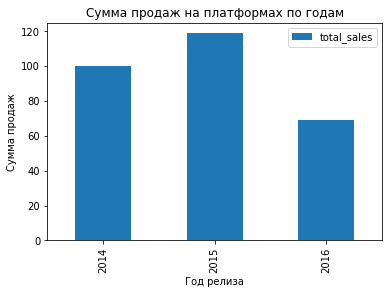

XOne


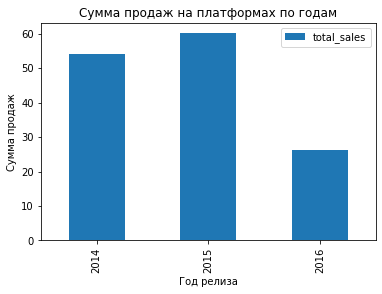

3DS


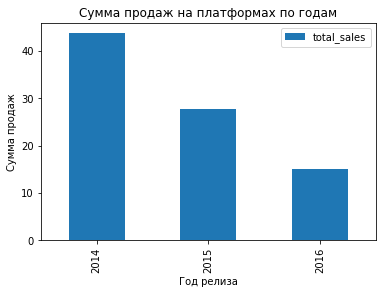

PS3


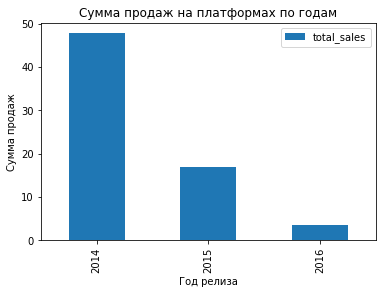

X360


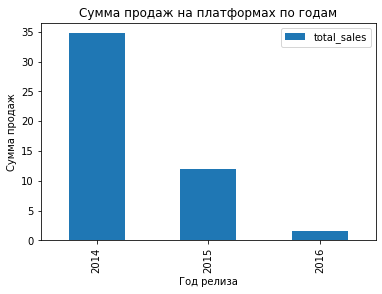

WiiU


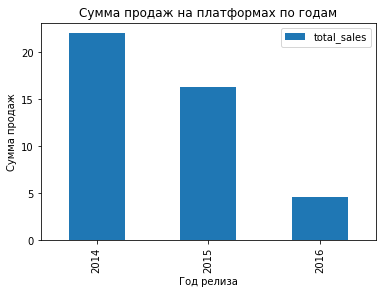

PC


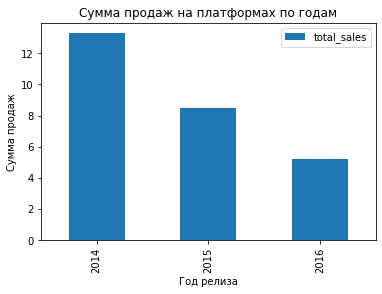

PSV


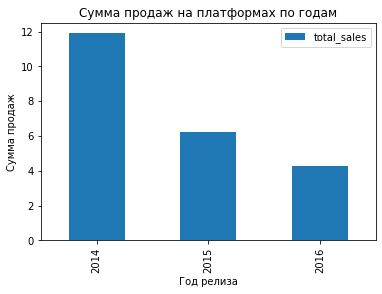

Wii


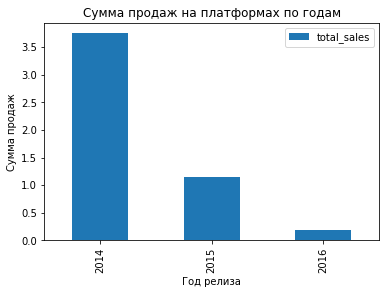

PSP


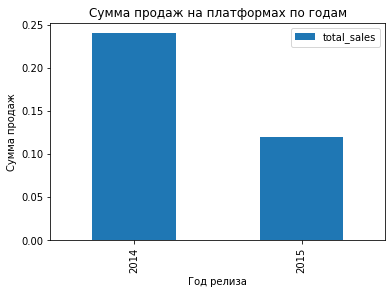

In [34]:
for platform in actual_platform_sales.index[:10]: #Берём 10 платформ из таблицы actual_platform_sales
    print(platform)
    (actual_data.query('platform == @platform').pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').plot(kind='bar'))
    plt.title('Сумма продаж на платформах по годам')
    plt.xlabel('Год релиза')
    plt.ylabel('Сумма продаж')
    plt.show()

ТОП 5 : PS4,XOne,3DS,PS3,X360


PS4: Рост суммы продаж на 2015 год относительно 2014, 2016 год данные могут быть не полные.( В зависимости от того когда произведён срез данных)


XOne : Рост суммы продаж на 2015 год относительно 2014, 2016 год данные могут быть не полные.( В зависимости от того когда произведён срез данных)



3DS: Снижение суммы продаж на 2015 год относительно 2014, 2016 год данные могут быть не полные.( В зависимости от того когда произведён срез данных)


PS3:Значительное снижение суммы продаж на 2015 год относительно 2014, 2016 год данные могут быть не полные.( В зависимости от того когда произведён срез данных)


WiiU: Снижение суммы продаж на 2015 год относительно 2014, 2016 год данные могут быть не полные.( В зависимости от того когда произведён срез данных)


PC: Снижение суммы продаж на 2015 год относительно 2014, 2016 год данные могут быть не полные.( В зависимости от того когда произведён срез данных)


PSV: Снижение суммы продаж на 2015 год относительно 2014, 2016 год данные могут быть не полные.( В зависимости от того когда произведён срез данных)


Wii: Стремится к 0

PSP: Снижение суммы продаж на 2015 год, относительно 2014, данных по продажам за 2016 нет.

По заданию неоюходимо выделить несколько потенциально прибыльных платформ: PC,PS4,XOne.

Построим и рассмотрим ящик с усами для платформ которые оказались в нашем датасете actual_data ( извлекли из даты год релиза 2014 год и после!)

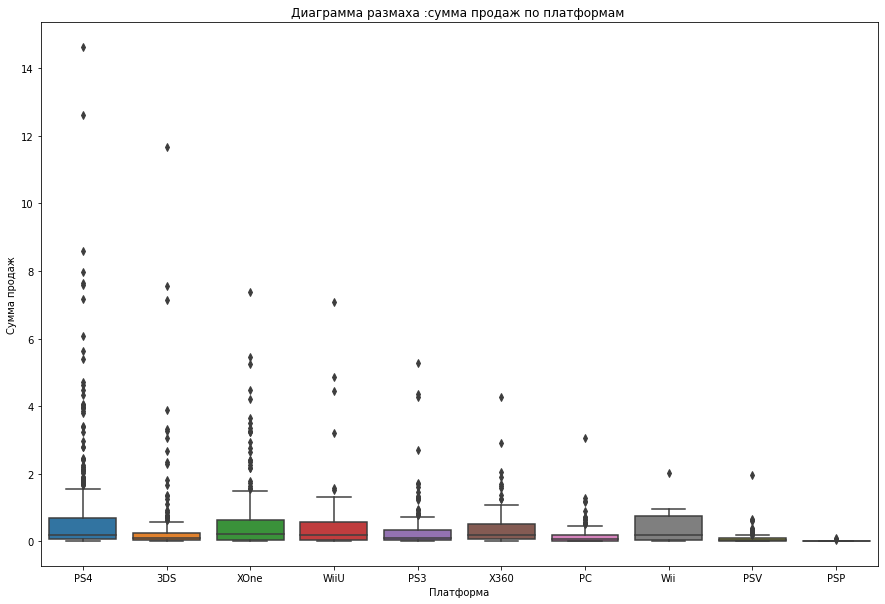

In [35]:
plt.figure(figsize = (15,10))
plt.title('Диаграмма размаха :сумма продаж по платформам ')
sns.boxplot(data = actual_data, x = 'platform', y= 'total_sales');
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()


Можем рассматривать выбросы(точки за усом) как игры которые "стрельнули", тоесть чем больше игр которые "зашли пользователям" тем больше выбросов, отсюда такое количество выбросов у PS4. Эти же можем объяснить диаграмму PSP , т.к. ранее мы уже выяснили, что в 2014-2015 годах они имели минимальный оборот продаж, и в 2016 году игры не продавались.
Основная масса значений - не высокая, в сравнении с имеющимися забросами.


Выполним корректировку нашего ящика с усами добавив ограничение по оси Y

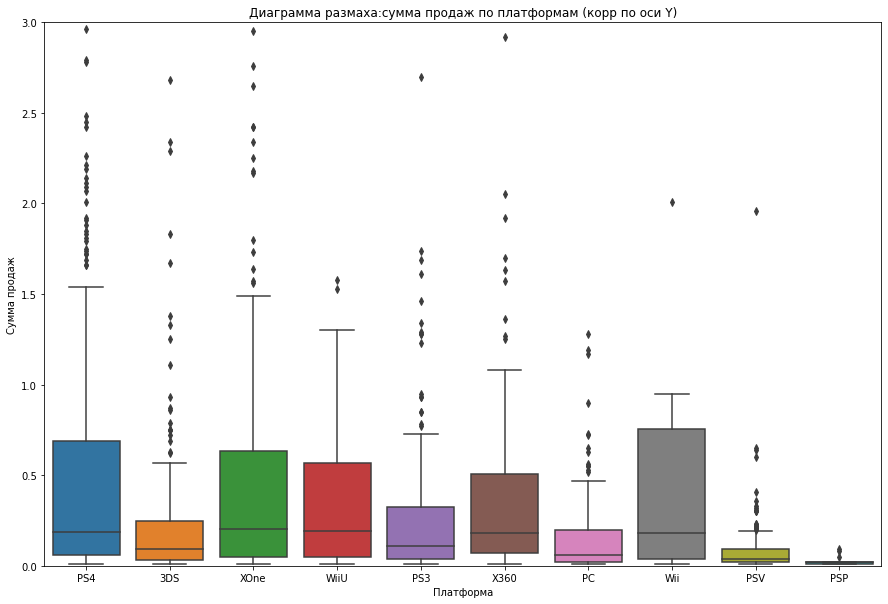

In [36]:
plt.figure(figsize = (15,10))
plt.ylim([0,3]) #Добавим ограничение по оси Y для наглядности
plt.title('Диаграмма размаха:сумма продаж по платформам (корр по оси Y)')
sns.boxplot(data = actual_data, x = "platform", y= 'total_sales');
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()


Нижний "ус" упирается в 0, среднее значение находится в нижней части ящика. Это говорит о том, что основные продажи небольшие по объёму продаж игры. 

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами, посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Определим коэффициент корреляции Пирсона между отзывами и продажами для топ платформы PS4 с помощью метода corr()

коэффициент корреляции Пирсона говорит нам о типе линейной связи

(положительная, отрицательная, отсутствие) между двумя переменными, а также о силе этой связи (слабая, умеренная, сильная).

In [37]:

print(len(actual_data.query('critic_score != -1')))
print(len(actual_data.query('user_score != -1')))
print(len(actual_data.query('critic_score != -1 & user_score != -1')))

718
888
704


In [38]:
PS4_U = actual_data.query('platform =="PS4" & user_score != -1')
PS4_U['user_score'].corr(PS4_U['total_sales'])

-0.040131589472697356

In [39]:
PS4_C = actual_data.query('platform == "PS4" & critic_score != -1')
PS4_C['critic_score'].corr(PS4_C['total_sales'])

0.40266141068104083

Строим диаграмму рассеивания ps4 user_score (-0.040131589472697356)

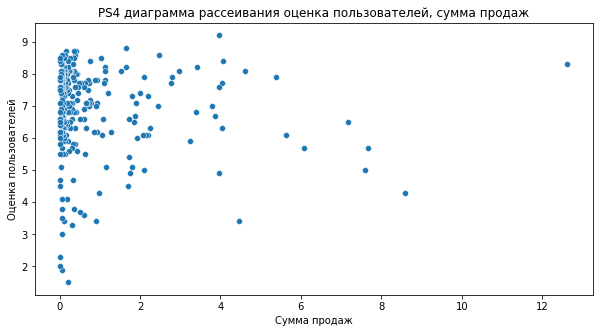

In [42]:
plt.figure(figsize=(10,5))
plt.title('PS4 диаграмма рассеивания оценка пользователей, сумма продаж')
sns.scatterplot(x='total_sales',y='user_score',data=PS4_U)
plt.xlabel('Сумма продаж')
plt.ylabel('Оценка пользователей')
plt.show()

Диаграмма рассеивания PS4 critic_score & total sales (0.40266141068104083)

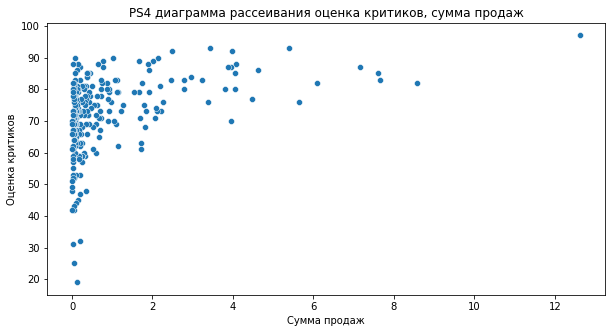

In [43]:
plt.figure(figsize=(10,5))
plt.title('PS4 диаграмма рассеивания оценка критиков, сумма продаж')
sns.scatterplot(x='total_sales',y='critic_score',data=PS4_C)
plt.xlabel('Сумма продаж')
plt.ylabel('Оценка критиков')
plt.show()

Напомню, из описательной статистики:

Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)

__Вывод__ Корреляция между оценками пользователей и суммами продаж практически отсутствует , значение корреляции составляет --0.040131589472697356 ,

Корреляция между оценками критиков и суммами продаж 0.40266141068104083 , это 40%, значит имеется зависимость суммы продаж от оценок критиков, назовём её умеренной.

Соотнесём выводы с продажами игр на других платформах.

Для сравнения возьмём другие популярные платформы: WiiU,PS3,XOne,X360,PC.
Для это создадим цикл.

games = actual_data[(actual_data['year_of_release']>=2014)&(['critic_score']>= -1) & (['user_score']>=-1)]

Расчет по Платформе 3DS


user_score     0.215193
total_sales    1.000000
Name: total_sales, dtype: float64

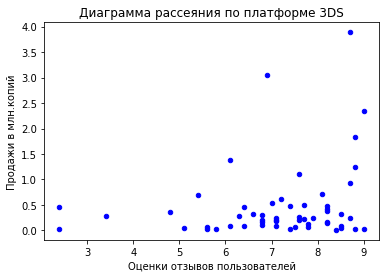

critic_score    0.314117
total_sales     1.000000
Name: total_sales, dtype: float64

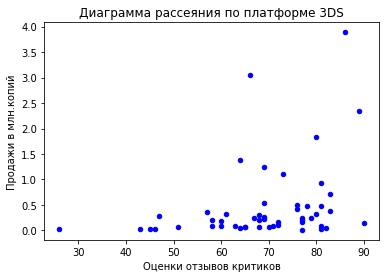

Расчет по Платформе PC


user_score    -0.071597
total_sales    1.000000
Name: total_sales, dtype: float64

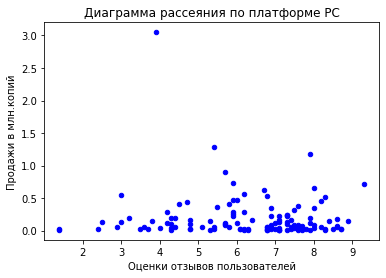

critic_score    0.174634
total_sales     1.000000
Name: total_sales, dtype: float64

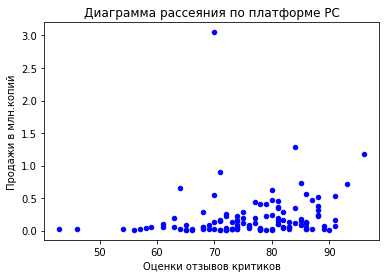

Расчет по Платформе PS3


user_score    -0.166761
total_sales    1.000000
Name: total_sales, dtype: float64

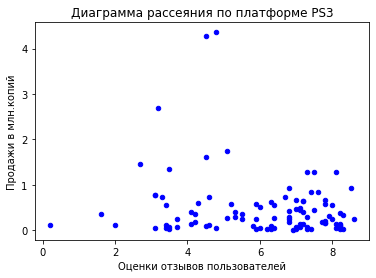

critic_score    0.446575
total_sales     1.000000
Name: total_sales, dtype: float64

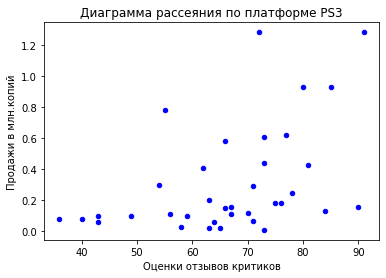

Расчет по Платформе PS4


user_score    -0.040132
total_sales    1.000000
Name: total_sales, dtype: float64

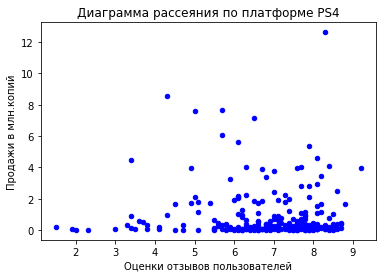

critic_score    0.402661
total_sales     1.000000
Name: total_sales, dtype: float64

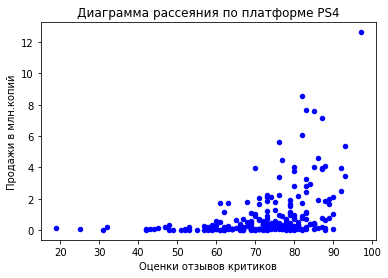

Расчет по Платформе PSP
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы PSP не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе PSV


user_score    -0.168455
total_sales    1.000000
Name: total_sales, dtype: float64

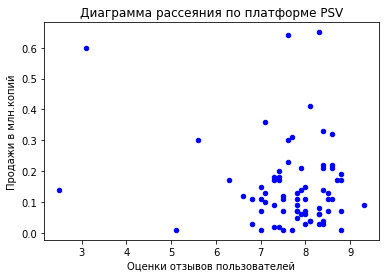

critic_score    0.042665
total_sales     1.000000
Name: total_sales, dtype: float64

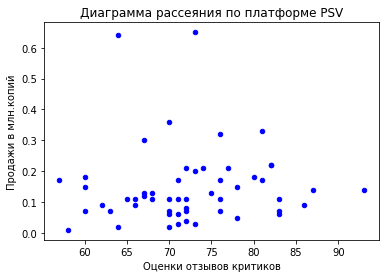

Расчет по Платформе Wii
Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей
Для платформы Wii не хватает данных для построения диаграммы и расчета корреляции отзывов критиков
Расчет по Платформе WiiU


user_score     0.407926
total_sales    1.000000
Name: total_sales, dtype: float64

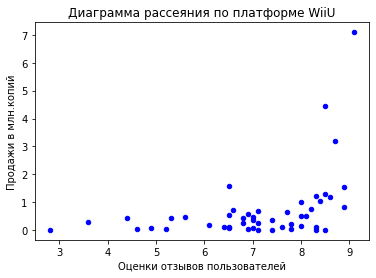

critic_score    0.370201
total_sales     1.000000
Name: total_sales, dtype: float64

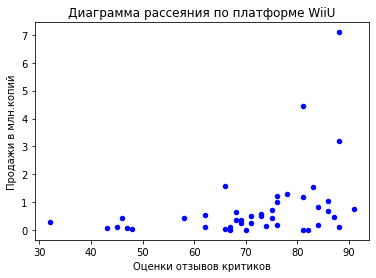

Расчет по Платформе X360


user_score    -0.138445
total_sales    1.000000
Name: total_sales, dtype: float64

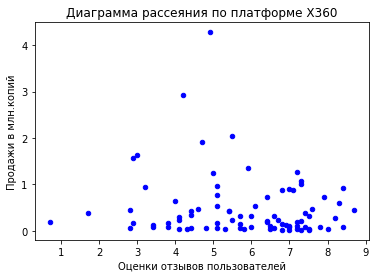

critic_score    0.525723
total_sales     1.000000
Name: total_sales, dtype: float64

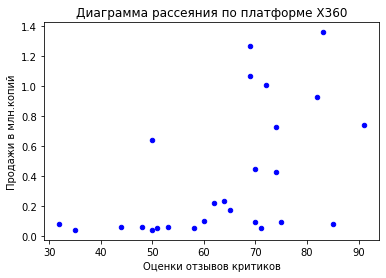

Расчет по Платформе XOne


user_score    -0.070384
total_sales    1.000000
Name: total_sales, dtype: float64

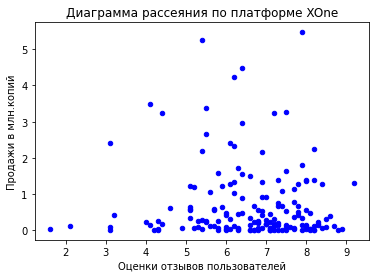

critic_score    0.428677
total_sales     1.000000
Name: total_sales, dtype: float64

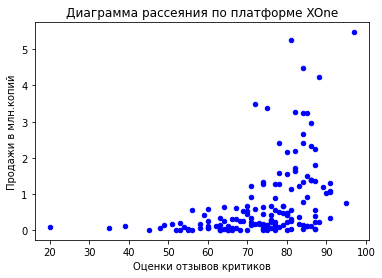

In [44]:

import matplotlib.pyplot as plt
df_sc, y = actual_data.copy(), 'total_sales'
for platform, games_on_pl in df_sc.groupby('platform'):
    print('='*60)
    print('Расчет по Платформе',platform)
    # Считаем сколько в колонке не пустых отзывов
    not_user = len(games_on_pl[(games_on_pl.user_score != -1)&(games_on_pl['user_score'].notna() == True)])
    not_critic = len(games_on_pl[(games_on_pl.critic_score != -1)&(games_on_pl['user_score'].notna() == True)])
    sum_not = 3 # Задаем количество не пустых значений для вывода диаграммы и расчета корреляции
    if not_user > sum_not:
        games_on_pl[games_on_pl.user_score != -1].plot(kind='scatter', x='user_score', y=y, color='b')
        display(games_on_pl[games_on_pl.user_score != -1][['user_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов пользователей')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов пользователей')
    if not_critic > sum_not:
        games_on_pl[games_on_pl.critic_score != -1].plot(kind='scatter', x='critic_score', y=y, color='b')
        display(games_on_pl[games_on_pl.critic_score != -1][['critic_score', y]].corr()[y])
        plt.xlabel('Оценки отзывов критиков')
        plt.ylabel('Продажи в млн.копий')
        plt.title('Диаграмма рассеяния по платформе '+platform)
        plt.show()
    else:
        print('Для платформы',platform, 'не хватает данных для построения диаграммы и расчета корреляции отзывов критиков')

XOne: Корреляция между оценкой критиков и продажами: 0.43 - Умеренная связь от отзывов критиков
Корреляция между оценкой пользователей и продажами: -0.092 - Слабая отрицательная связь

X360
Корреляция между оценкой критиков и продажами: 0.53 - Умеренная связь от отзывов критиков 
Корреляция между оценкой пользователей и продажами: 0.34 -Умеренная положительная связь

PC
Корреляция между оценкой критиков и продажами: 0.17 -Слабая положительная связь 
Корреляция между оценкой пользователей и продажами: -0.09 - Слабая отрицательная связь


Из наблюдений за параметром корреляции можем сказать : Корреляция между критиками и продажами всегда положительная и больше влияет на продажи в целом.

Корреляция между пользователями , чаще отрицательна , и слабая.

__Вывод__ Оценки критиков значительно сильнее влияют на продажи

Рассмотрим общее распределение игр по жанрам.

Создадим сводную таблицу и отсортируем по количеству продаж по убыванию

In [45]:
data_genre = actual_data.pivot_table(index='genre',values='total_sales',aggfunc='sum').sort_values(by='total_sales',ascending=False)
data_genre = data_genre.reset_index()  # Без reset_index не строится график , ни совсем понимаю почему.

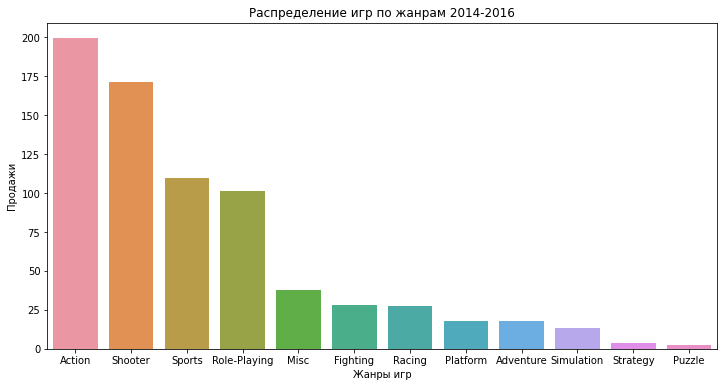

In [46]:
plt.figure(figsize=(12,6))
plt.title('Распределение игр по жанрам 2014-2016')
sns.barplot(data=data_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр')
plt.ylabel('Продажи')
plt.show()

Построим диаграмму размаха по жанру игра и суммарным продажам, для определения медианных продаж, чтобы уже по медианным продажам определить лучшие продажи по жанрам.

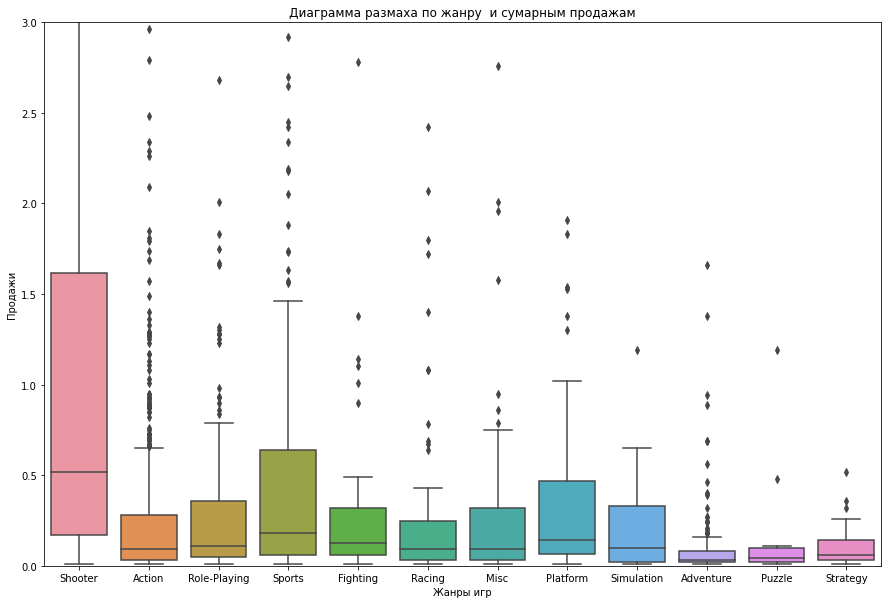

In [47]:
plt.figure(figsize = (15,10))
plt.title('Диаграмма размаха по жанру  и сумарным продажам')
plt.ylim([0,3])
sns.boxplot(data = actual_data, x = "genre", y='total_sales')
plt.xlabel('Жанры игр')
plt.ylabel('Продажи')
plt.show()

По медианным продажам ситуация меняется:
    
Лучшие продажи по жанрам: Shooter
    
второе место : sports
    
третье место : misc
    
последнее место :adventure

__Вывод__ 
Мы провели исследовательский анализ данных.

Выделив 6 платформ по сумме продаж за все годы, мы увидели что платформы  были на пике продаж в годы намного раньше и к нынешнему (2016 год) уже не выпускаются, либо имеют мизерную выручку по сравнению с предыдущим успехом, следовательно необходимо брать данные за последние 3 года, чтобы найти актуальные платформы.
Отвечая на вопрос задания : 
Данные за все периоды - не важны.
Рассмотрели как менялись продажи по платформам.

Выбраны платформы с наибольшими суммарными продажами и построены распределения по годам.
Характерный срок существования платформы - 10 лет

При этом первые пару лет они набирают оборот, 3-5 лет находятся на пике , и дальше их популярность падает , а вместе с популярностью и продажи.
Взяли данные за соответствующий актуальный период. Актуальный период определим 2014,2015,2016,т.к основной фактор - эти данные помогут построить прогноз на 2017 год.
При извлечении данных за актуальный период (2014-2016гг.)таблица координально изменилась .
5 топ платформ: PS4,XOne,3DS,PS3,X360,но самое интересное что платформ для разработки за эти годы,стало всего 10.
Соответственно мы уже можем предположить что в случае появления новой платформы она не "стрельнет" за следующий год в топ, т.к по аналитике данных предыдущих лет мы видим что платформа "разгоняется" для достижений результатов.

Выбрали три наиболее перспективные платформы :PC,PS4,XOne.

Построили диаграммы размаха. Рассмотрели выбросы.
Выбросы(точки за усом)выглядят, как игры которые "стрельнули", тоесть чем больше игр которые "зашли пользователям" тем больше выбросов, отсюда такое количество выбросов у PS4. Эти же можем объяснить диаграмму PSP , т.к. ранее мы уже выяснили, что в 2014-2015 годах они имели минимальный оборот продаж, и в 2016 году игры не продавались.
Основная масса значений - не высокая, в сравнении с имеющимися забросами.
Нижний "ус" упирается в 0, среднее значение находится в нижней части ящика. Это говорит о том, что основные продажи небольшие по объёму продаж игры. 

Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами по интересующим нас платформам.
Сделали вывод, что оценки критиков значительно сильнее влияют на продажи.

Рассмотрели общее распределние игр по жанрам продажам:Лучшие продажи по жанрам: Shooter
    
второе место : sports
    
третье место : misc
    
последнее место :adventure




__Шаг 4. Составим портрет пользователя каждого региона__

Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишем различия в долях продаж.
Самые популярные жанры (топ-5). Поясним разницу.
Ответим на вопрос, влияет ли рейтинг ESRB на продажи в отдельном регионе?

Топ 5 плафторм для региона NA:

Создадим перменную top_na , сгруппируем данные из датасета actual_data platform по столбцу na_sales , посчитаем сумму и упорядочим по убыванию.Построим график 

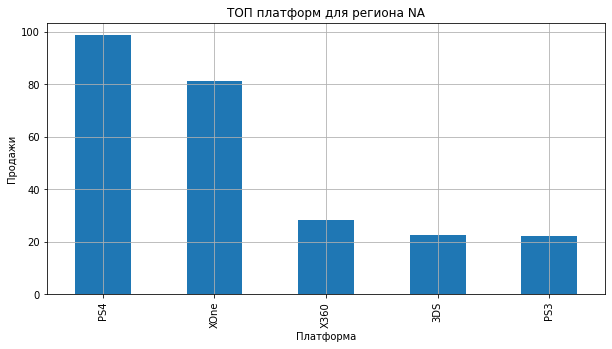

In [48]:
top_na = actual_data.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)  
top_na.plot(kind='bar',x='platform',y='na_sales',figsize=(10,5),grid=True,title='ТОП платформ для региона NA')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()


В регионе N/A по продажам лидирует платформа PS4

Второе место занимает XOne 

Третье место X360

четвёртое место 3DS

пятое место PS3


Топ 5 плафторм для региона EU:


Создадим перменную top_eu , сгруппируем данные из датасета actual_data platform по столбцу eu_sales , посчитаем сумму и упорядочим по убыванию.Построим график 

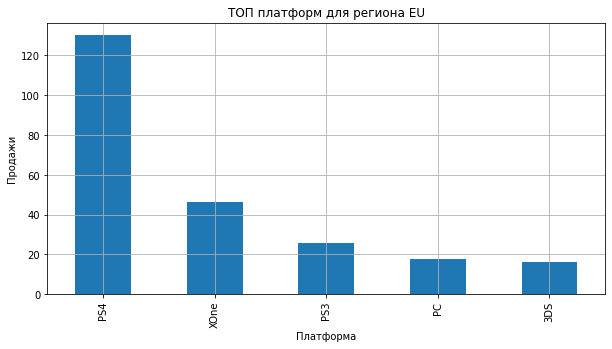

In [49]:
top_eu = actual_data.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)  
top_eu.plot(kind='bar',x='platform',y='eu_sales',figsize=(10,5),grid=True,title='ТОП платформ для региона EU')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()


В регионе EU лидирует всё-таже платформа PS4

Второе место: XOne

Третье место: PS3

Четвёртое место: PC

Пятое место : 3DS

Топ 5 плафторм для региона JP:

Создадим перменную top_jp , сгруппируем данные из датасета actual_data platform по столбцу jp_sales , посчитаем сумму и упорядочим по убыванию.Построим график. 

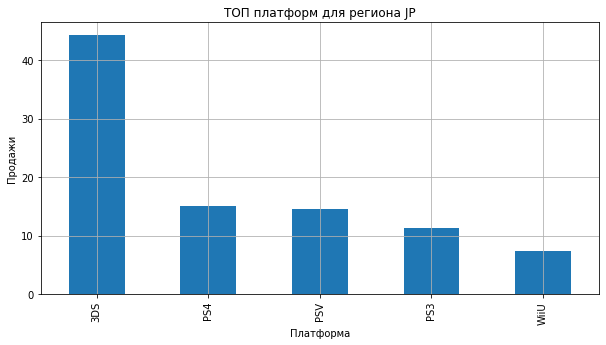

In [50]:
top_jp = actual_data.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)  
top_jp.plot(kind='bar',x='platform',y='jp_sales',figsize=(10,5),grid=True,title='ТОП платформ для региона JP')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()


В регионе JP лидирует уже платформа 3DS

 PS4 занимает лишь второе место,

Третье место: PSV

Четвёртое место: PS3

Пятое место : WiiU

PS4 Является фаворитом в регионах , занимает первые места в в Северной Америке и Европе, 2 место в Японии
В Японии первое место занимает платформа 3DS , в то время как в других регионах данная платформа занимает 4 и 5 место
Также стоит отметить что объёмы выручки продаж в регионах Европы и Севереной Америке по ТОП платформе варьируются от 90 до 120 млн., в то время как оборот от продаж в регионе Японии по топ платформе составляет ~45 млн, тоесть в два раза меньше в сравнении.

 Самые популярные жанры (топ-5) по регионам. Сопоставим жанр с выручкой по региону.

Топ 5 плафторм для региона NA:

Создадим перменную genre_na , сгруппируем данные из датасета actual_data platform по столбцу na_sales , посчитаем сумму и упорядочим по убыванию.Построим график 

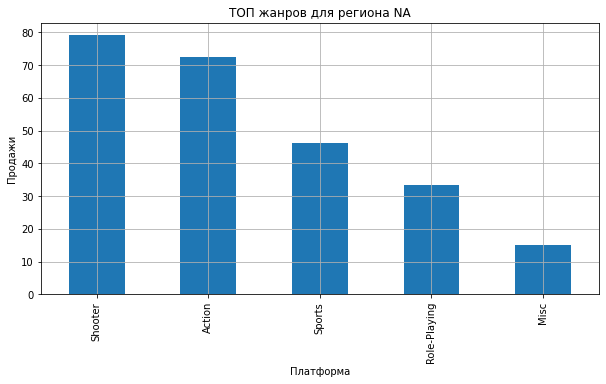

In [51]:
genre_na = actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)  
genre_na.plot(kind='bar',x='platform',y='na_sales',figsize=(10,5),grid=True,title='ТОП жанров для региона NA')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

Жанр Shooter имеет наибольший успех в регионе Северная Америка.

Второе место жанр Actions

Третье место sports

Топ 5 плафторм для региона EU:

Создадим перменную genre_eu , сгруппируем данные из датасета actual_data platform по столбцу eu_sales , посчитаем сумму и упорядочим по убыванию.Построим график 

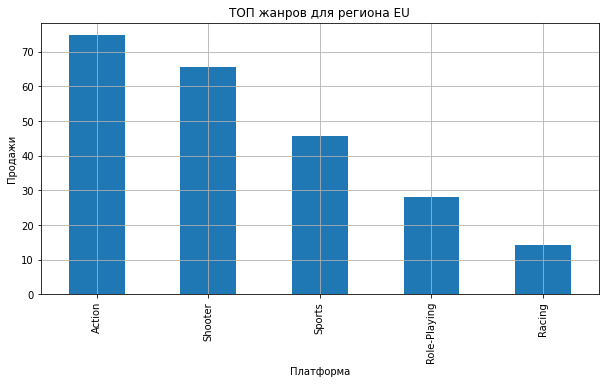

In [52]:
genre_eu = actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)  
genre_eu.plot(kind='bar',x='genre',y='eu_sales',figsize=(10,5),grid=True,title='ТОП жанров для региона EU')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

Жанр action имеет наибольший успех в Европе.

Второе место жанр Shooter

Третье место sports

Топ 5 плафторм для региона JP:

Создадим перменную genre_jp , сгруппируем данные из датасета actual_data platform по столбцу jp_sales , посчитаем сумму и упорядочим по убыванию.Построим график 

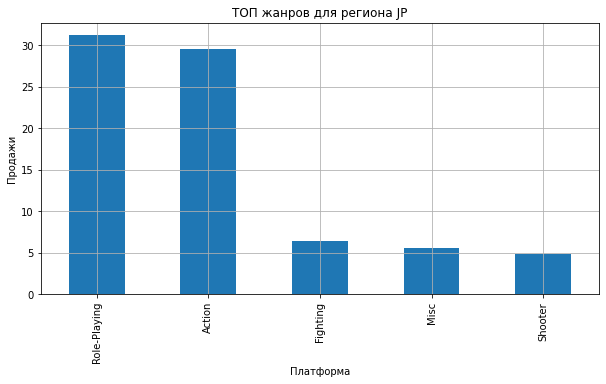

In [53]:
genre_jp = actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)  
genre_jp.plot(kind='bar',x='genre',y='jp_sales',figsize=(10,5),grid=True,title='ТОП жанров для региона JP')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

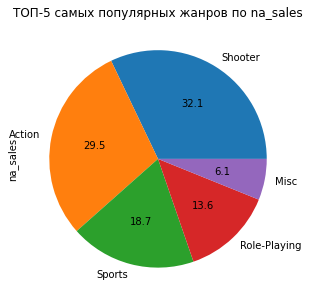

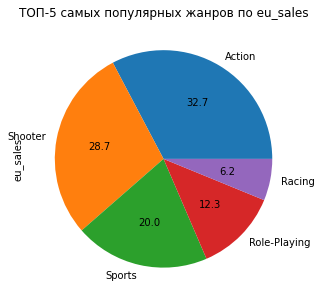

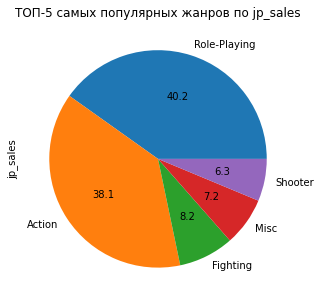

In [54]:
regions = ['na_sales','eu_sales','jp_sales']
for region in regions:
    data_region = actual_data.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    data_region.plot(kind = 'pie', figsize=(5,5),autopct='%1.1f', title ='ТОП-5 самых популярных жанров по ' + region)
    plt.show()

Жанр action занимает первое место для регионов Европы и Северной Америки,жанр шутер и спорт тоже весьма популярны.

Жанр Role-Playing  занимает первое место в Японии

Второе место жанр Action

Fighthing занимает третье место

Можем сделать вывод, жанры Action,shooter, sport наиболее успешны в регионах Европы и Северной Америки, в в то время как в Японии в лидерах жанры Role-Playing,Action,Fighting.

Также обратим внимание что продажи в Европе и Северной америке по жанрам варьируется в ТОПе от 80,до 90 млн. в то время как в Японии значения намного скромнее, и составляют порядка 30 млн.

Ответим на вопрос, влияет ли рейтинг ESRB на продажи в отдельном регионе?

Расшифровка обозначений рейтинга ESRB

«E» («Everyone»)  для всех 

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»

«T» («Teen») — «Подросткам»:Игра подходит для лиц от 13 лет.

«M» («Mature») — «Для взрослых»:Материалы игры не подходят для лиц младше 17 лет


Построим сводную таблицу, с учётом замены значений на "-1"

In [55]:
rating = actual_data.query('rating != "-1"').pivot_table(index='rating',values=['na_sales','eu_sales','jp_sales'],aggfunc='sum')


Построим диаграммы типа pie: для кадого региона.

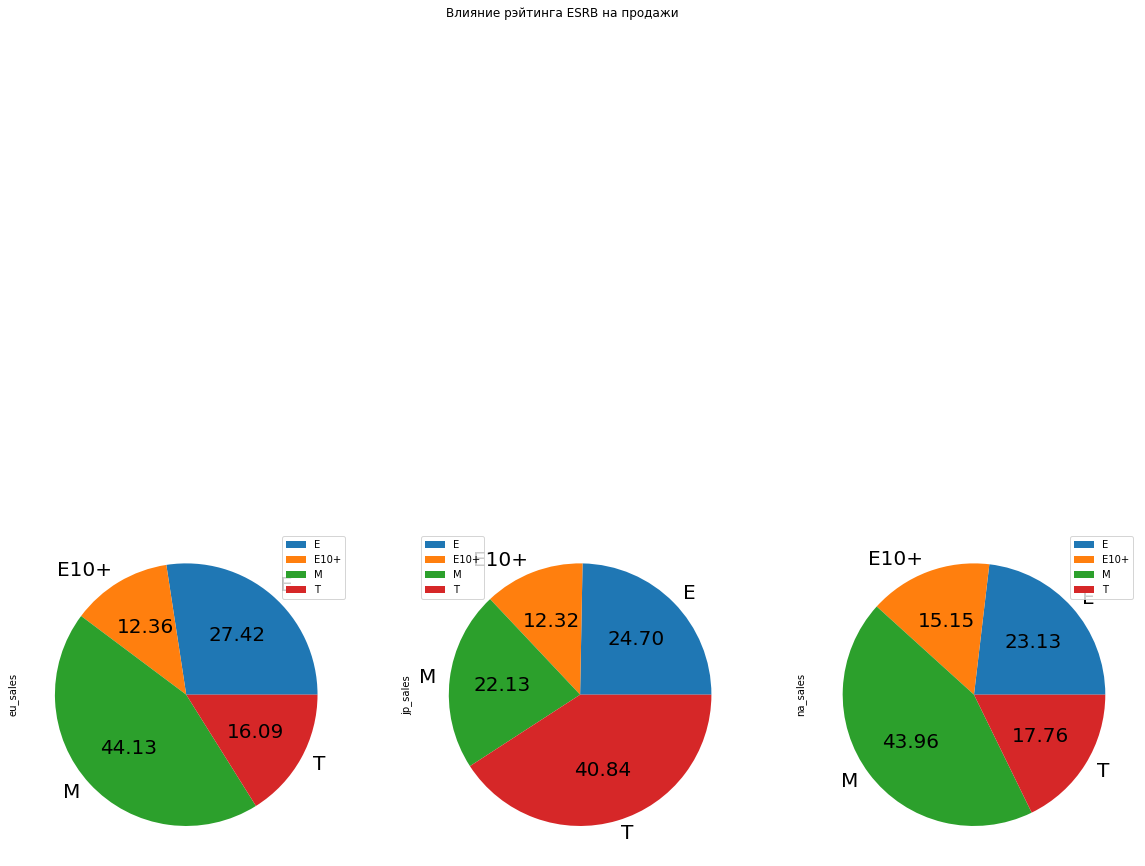

In [56]:
rating.plot(kind='pie',subplots=True,figsize=(20,20),title='Влияние рэйтинга ESRB на продажи',autopct="%.2f",fontsize=20)
plt.show()


Отвечая на вопрос задания, мы можем сказать что рейтинг ESRB влияет на продажи в отдельном регионе.
В Европейском и Северо-Американском регионе почти 44% игр продаются с рейтингом М ( для взрослых, с ограничением не младше 17 лет). В то время как в Японском регионе, подавляющее большинство игр, почти 41%, с рейтингом Т(Teen) подросткам, игра подходит для лиц от 13 лет.

__Вывод__ 
Составим пользователя каждого из представленных регионов:
Северо-Американец : Чаще всего предпочитающий игровую платформу PS4 , предпочитающий жанр игры Шутер, с пометкой по рейтингу ESRB "М", для взрослых, с ограничением не младше 17лет.

Европеец : Чаще всего предпочитающий игровую платформу PS4, предпочитающий жанр Action, с пометкой по ретйингу ESRB "M", для взрослых, с ограничением не младше 17лет.

Японец: Чаще всего предпочитающий игровую платформу 3DS, предпочитающий жанр  Role-Playing , с пометкой ESRB "T", подросткам, игра подходит для лиц от 13 лет .

Можно сделать вывод что типичный пользователь из Северной Америки и Европы , похожи друг на друга в своих предпочтениях, заметно отличаются от них пользователи из Японии.



Шаг 5. __Проверим гипотезы__
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
Задайте самостоятельно пороговое значение alpha.
Поясните:
Как вы сформулировали нулевую и альтернативную гипотезы;
Какой критерий применили для проверки гипотез и почему.

Нулевая гипотеза:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые (разные)
Гипотезы формулируются от обратного , в основном если А=В , значит альтернативная гипотеза А!=В 

In [57]:
# Берём значения из actual_data выше нуля, для исключения подставленных нами значений "-1"
actual_data=actual_data[actual_data['user_score']>=0]
#Создаём перменные с Xone и PC 
XOne = actual_data[actual_data['platform']=='XOne'] #Извлекаем строки , где платформа = иксуан
PC = actual_data[actual_data['platform']=='PC'] #Извлекаем строки , где платформа = ПК
print('Средний пользовательский рейтинг платформ Xbox One', actual_data.query('platform =="XOne"')['user_score'].mean())
print('Средний пользовательский рейтинг платформ PC',actual_data.query('platform =="PC"')['user_score'].mean())
#Создаём перменные XOne_user,PC_user с оценками пользователей
XOne_user = XOne['user_score'] 
PC_user = PC['user_score']
#Задаём критический уровень значимости:
alpha = 0.05 #По стандарту 
results = st.ttest_ind (XOne_user,PC_user) #проведение двухвыборочного t-теста
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг платформ Xbox One 6.594545454545456
Средний пользовательский рейтинг платформ PC 6.298360655737705
p-значение: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


У нас нет достаточных данных, чтобы сказать, что средние пользовательские рейтинги платформ XboxOne и PC не одинаковые(разные)

Нулевая гипотеза : Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») равны.
Альтернаятивная гипотеза : Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны (разные).

In [58]:
#Создаём перменные action и sport
action=actual_data[actual_data['genre']=='Action']
sport=actual_data[actual_data['genre']=='Sports']
print('Средний пользовательский рейтинг жанра action', actual_data.query('genre =="Action"')['user_score'].mean())
print('Средний пользовательский рейтинг жанра sports',actual_data.query('genre =="Sports"')['user_score'].mean())
#Создаём перменные  с оценками пользователей
action_user=action['user_score']
sport_user=sport['user_score']
# задаём  критический уровень значимости:
alpha=0.05
results=st.ttest_ind(action_user,sport_user)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Средний пользовательский рейтинг жанра action 6.760606060606061
Средний пользовательский рейтинг жанра sports 5.2251968503937
p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


Есть все основания полагать, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») не равны (разные).

__Вывод__
Мы отвергли одну нулевую гипотезу, другую гипотезу отвергнуть не удалось.
в работе использовали гипотезу о равенстве средних двух генеральных совокупностей, т.к не сравнивали их с каким-то число , а сравнивали их друг с другом,когда сравнивают средние двух генеральных совокупностей, нулевую гипотезу можно сформулировать так: «средние значения совокупностей равны», соответственно альтернативной гипотезой бужет "средние значения совокупностей разные (не равны)

__Общий вывод__
В ходе выполнения работ мы выполнили работу по __предобработке данных:__ 
Мы перевели название столбцов к нижнему регистру. Проверили датасет на дубликаты, дубликаты отсутствуют

Обработали пропуски, там где их было не большое кол-во удалили т.к их объём меньше 10% и они не повлияют на итоги исследований.

Там где их было много заменили на отрицательное число (-1) эти значения будут выделяться , поэтому мы сможем определить какие значения поставили МЫ.

Преобразовали тип данных интересующих нас столбцов.(почти везде где хотели)

Описали значение TBD: Значение TBD подразумевает собой To Be Determined (будет определено) Используется, если какая-то информация еще не определена или решение по вопросу не принято.

Посчитали суммарные продажи во всех регионах и записали их в отдельный столбец : total_sales

Причиной пропусков может являться ещё "не выход" игр в свет , тоесть в скором времени может ожидаться премьера)

Выполнили __Исследовательский анализ данных.__

Выделив 6 платформ по сумме продаж за все годы, мы увидели что платформы были на пике продаж в годы намного раньше и к нынешнему (2016 год) уже не выпускаются, либо имеют мизерную выручку по сравнению с предыдущим успехом, следовательно необходимо брать данные за последние 3 года, чтобы найти актуальные платформы. Отвечая на вопрос задания : Данные за все периоды - не важны. Рассмотрели как менялись продажи по платформам.

Выбраны платформы с наибольшими суммарными продажами и построены распределения по годам. Характерный срок существования платформы - __7__ лет

При этом первые пару лет они набирают оборот, 3-5 лет находятся на пике , и дальше их популярность падает , а вместе с популярностью и продажи. Взяли данные за соответствующий актуальный период. Актуальный период определим 2014,2015,2016,т.к основной фактор - эти данные помогут построить прогноз на 2017 год. При извлечении данных за актуальный период (2014-2016гг.)таблица координально изменилась . 5 топ платформ: PS4,XOne,3DS,PS3,X360,но самое интересное что платформ для разработки за эти годы,стало всего 10. Соответственно мы уже можем предположить что в случае появления новой платформы она не "стрельнет" за следующий год в топ, т.к по аналитике данных предыдущих лет мы видим что платформа "разгоняется" для достижений результатов.

Выбрали три наиболее перспективные платформы :PC,PS4,XOne.

Построили диаграммы размаха. Рассмотрели выбросы. Выбросы(точки за усом)выглядят, как игры которые "стрельнули", тоесть чем больше игр которые "зашли пользователям" тем больше выбросов, отсюда такое количество выбросов у PS4. Эти же можем объяснить диаграмму PSP , т.к. ранее мы уже выяснили, что в 2014-2015 годах они имели минимальный оборот продаж, и в 2016 году игры не продавались. Основная масса значений - не высокая, в сравнении с имеющимися забросами. Нижний "ус" упирается в 0, среднее значение находится в нижней части ящика. Это говорит о том, что основные продажи небольшие по объёму продаж игры.

Построили диаграмму рассеяния и посчитали корреляцию между отзывами и продажами по интересующим нас платформам. Сделали вывод, что оценки критиков значительно сильнее влияют на продажи.

Рассмотрели общее распределние игр по жанрам продажам: Лидером является жанр Лучшие продажи по жанрам: Shooter
второе место : sports
третье место : misc
последнее место :adventure

__Составили портрет пользователя каждого региона:__

Составили пользователя каждого из представленных регионов:

Северо-Американец : Чаще всего предпочитающий игровую платформу PS4 , предпочитающий жанр игры Шутер, с пометкой по рейтингу ESRB "М", для взрослых, с ограничением не младше 17лет.

Европеец : Чаще всего предпочитающий игровую платформу PS4, предпочитающий жанр Action, с пометкой по ретйингу ESRB "M", для взрослых, с ограничением не младше 17лет.

Японец: Чаще всего предпочитающий игровую платформу 3DS, предпочитающий жанр Role-Playing , с пометкой ESRB "T", подросткам, игра подходит для лиц от 13 лет .

Можно сделать вывод что типичный пользователь из Северной Америки и Европы , похожи друг на друга в своих предпочтениях, заметно отличаются от них пользователи из Японии.

__Проверили гипотезы__

Мы отвергли одну нулевую гипотезу, другую гипотезу отвергнуть не удалось.
в работе использовали гипотезу о равенстве средних двух генеральных совокупностей, т.к не сравнивали их с каким-то число , а сравнивали их друг с другом,когда сравнивают средние двух генеральных совокупностей, нулевую гипотезу можно сформулировать так: «средние значения совокупностей равны», соответственно альтернативной гипотезой бужет "средние значения совокупностей разные (не равны)

__Отвечая на вопрос исследования, на что потратить рекламный бюджет, мы составили портрет пользователя каждого региона, определили платформу доминирующую в данном регионе, и жанр игры который предпочитают большинство юзеров.__ 

__Опираясь на эти данные , и то , что объёмы продаж в Японии заметно меньше, чем в Европе и Северной Америке , рекламный бюджет стоит направить на регионы Европа, Северная Америка, из нашего исследования , мы выяснили что топом продаж является шутер, а самая популярная платформа в этих регионах PS4.

__Что касается рейтинга ERSB, мы можем определить категорию юзеров , а соответственно и их платёжеспособность.  рейтинг М ( для взрослых, с ограничением не младше 17 лет будет является фаворитом ( для выбранных регионов)

__Внимание на отзывы стоит обращать в любом случае , не взирая на результаты нашего исследования__


